In [17]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [18]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

In [10]:
'''x_train = x_train[0]
img_len , img_width = x_train.shape
print('Size of input image:', img_len, 'x',img_width)'''

"x_train = x_train[0]\nimg_len , img_width = x_train.shape\nprint('Size of input image:', img_len, 'x',img_width)"

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer = "sgd",
loss = "sparse_categorical_crossentropy",
metrics = ['accuracy'])

In [21]:
history = model.fit(x_train,y_train, validation_data =(x_test,y_test),epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7204 - loss: 1.0681 - val_accuracy: 0.8991 - val_loss: 0.3622
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9009 - loss: 0.3574 - val_accuracy: 0.9166 - val_loss: 0.2974
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9133 - loss: 0.3059 - val_accuracy: 0.9248 - val_loss: 0.2657
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9231 - loss: 0.2679 - val_accuracy: 0.9325 - val_loss: 0.2439
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9334 - loss: 0.2419 - val_accuracy: 0.9365 - val_loss: 0.2220
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9364 - loss: 0.2259 - val_accuracy: 0.9409 - val_loss: 0.2069
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9430 - loss: 0.2024 - val_accuracy: 0.9449 - val_loss: 0.1930
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9461 - loss: 0.1952 - 

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss =%.3f" %test_loss)
print("Accuracy =%.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9438 - loss: 0.1922
Loss =0.164
Accuracy =0.953


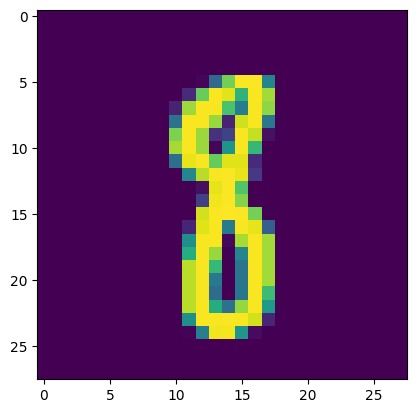

In [24]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


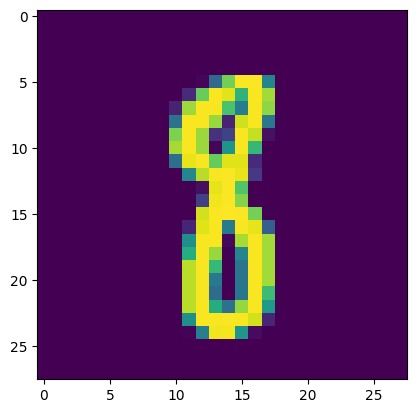

In [25]:
predicted_value = model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

In [28]:
print("Predicted Value", predicted_value[n])

Predicted Value [9.0901631e-06 2.4061816e-02 2.0967289e-03 2.0083135e-03 2.2207309e-05
 2.1143367e-03 2.3026930e-04 3.4030829e-05 9.6920979e-01 2.1343090e-04]


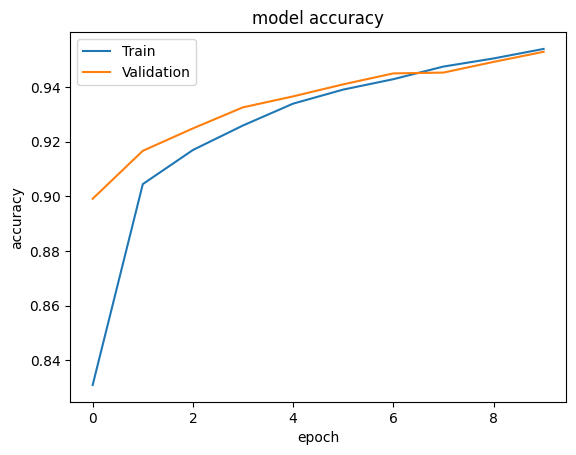

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


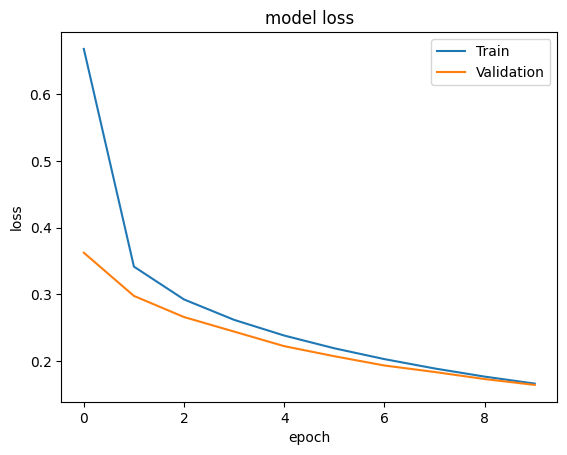

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
